In [2]:
!pip install -q opendatasets
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 71.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
od.download('https://www.kaggle.com/datasets/akshaypawar7/millions-of-movies')
data = pd.read_csv("/content/millions-of-movies/movies.csv")
data

Skipping, found downloaded files in "./millions-of-movies" (use force=True to force download)


,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
3,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,475766228.0,125.0,Released,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...
4,677179,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,3994.342,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,75000000.0,269000000.0,116.0,Released,You can't run from your past.,7.262,1129.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,/5i6SjyDbDWqyun8klUuCxrlFbyw.jpg,965839-267805-943822-842942-1035806-823999-107...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722496,603948,"Mike Siegel: Have Jokes, Will Travel",NaN,en,Mike Siegel is a stand-up comedian TV host and...,0.600,NaN,NaN,0.0,0.0,NaN,Released,NaN,0.000,0.0,NaN,NaN,NaN,NaN,NaN
722497,379615,ROH: Survival of The Fittest - Night 2,NaN,en,Second Round Matches Cedric Alexander vs. Wil...,0.600,Ring of Honor (ROH),2015-11-14,0.0,0.0,0.0,Released,NaN,0.000,0.0,Cederick Johnson-Caleb Dewall-Aaron Frobel-Jam...,pro wrestling,NaN,NaN,NaN
722498,957818,Hollywood Varieties,Comedy,en,Entertainment trade-paper headlines report the...,0.600,NaN,1950-01-01,0.0,0.0,60.0,Released,Big time Vaudeville on the screen,0.000,0.0,Robert Alda-Ken Trietsch-Paul Trietsch-Al Shaw...,NaN,NaN,NaN,NaN
722499,179422,Uriah Heep - Between Two Worlds,Music,en,This is the stunning film of Uriah Heep live o...,0.600,NaN,2005-05-02,0.0,0.0,75.0,Released,NaN,0.000,0.0,Bernie Shaw-Lee Kerslake-Mick Box-Phil Lanzon-...,NaN,/9IlU9fQ8oEm21TMB425KU5EwpJn.jpg,NaN,NaN


In [7]:
train = pd.read_csv("Train_data.csv")
train.columns


Index(['Unnamed: 0', 'id', 'title', 'genres', 'original_language', 'overview',
       'popularity', 'production_companies', 'release_date', 'budget',
       'revenue', 'runtime', 'status', 'tagline', 'vote_average', 'vote_count',
       'credits', 'keywords', 'poster_path', 'backdrop_path',
       'recommendations', 'result'],
      dtype='object')

In [9]:
train_data = train[["popularity","budget","revenue","runtime","vote_average","vote_count"]]
train_data["result"]=train["result"]
train_data= train_data[train_data["budget"]>0]
train_data_copy=train_data
train_data=train_data.dropna()


<ipython-input-9-3be407092155>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["result"]=train["result"]


In [10]:
X= train_data.drop("result",axis=1).values
y= train_data["result"].values
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
x_train

array([[1.04103000e+02, 1.50000000e+08, 1.67153744e+09, 1.24000000e+02,
        6.67800000e+00, 1.88600000e+04],
       [9.52140000e+01, 1.25000000e+08, 4.85004754e+08, 1.01000000e+02,
        5.90000000e+00, 6.14700000e+03],
       [1.10478000e+02, 2.00000000e+07, 8.44260310e+07, 1.10000000e+02,
        7.10000000e+00, 5.12700000e+03],
       ...,
       [2.43528000e+02, 2.00000000e+08, 9.52224986e+08, 1.26000000e+02,
        7.38000000e+00, 7.40800000e+03],
       [7.13240000e+01, 3.00000000e+08, 6.57926987e+08, 1.20000000e+02,
        6.10100000e+00, 1.21040000e+04],
       [3.13929000e+02, 2.00000000e+07, 2.90900000e+08, 1.10000000e+02,
        7.72100000e+00, 3.19000000e+03]])

In [19]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)
score =KNN.score(x_test,y_test)
print(score)
report = classification_report(y_test,y_pred)
print(report)
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

0.9504132231404959
              precision    recall  f1-score   support

 Blockbuster       1.00      1.00      1.00        85
         Hit       0.50      0.50      0.50         6
   Super Hit       1.00      0.86      0.92         7
    disaster       1.00      0.92      0.96        12
        flop       0.77      0.91      0.83        11

    accuracy                           0.95       121
   macro avg       0.85      0.84      0.84       121
weighted avg       0.95      0.95      0.95       121

[[85  0  0  0  0]
 [ 0  3  0  0  3]
 [ 0  1  6  0  0]
 [ 0  1  0 11  0]
 [ 0  1  0  0 10]]


In [21]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)
print(tree.score(x_test,y_test))
report=classification_report(y_test,y_pred)
print(report)

0.8760330578512396
              precision    recall  f1-score   support

 Blockbuster       0.99      0.94      0.96        85
         Hit       0.40      0.33      0.36         6
   Super Hit       0.50      0.86      0.63         7
    disaster       1.00      0.92      0.96        12
        flop       0.58      0.64      0.61        11

    accuracy                           0.88       121
   macro avg       0.69      0.74      0.70       121
weighted avg       0.89      0.88      0.88       121



In [26]:
rf = RandomForestClassifier(max_depth=10)
rf.fit(x_train,y_train)
print(rf.score(x_test,y_test))
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))

0.8347107438016529
              precision    recall  f1-score   support

 Blockbuster       0.87      1.00      0.93        85
         Hit       0.17      0.17      0.17         6
   Super Hit       1.00      0.29      0.44         7
    disaster       0.85      0.92      0.88        12
        flop       1.00      0.18      0.31        11

    accuracy                           0.83       121
   macro avg       0.78      0.51      0.55       121
weighted avg       0.85      0.83      0.80       121



In [27]:
svm = svm.SVC()
svm.fit(x_train,y_train)
print(svm.score(x_test,y_test))

0.7107438016528925


In [41]:
x_data=data
x_data = x_data.dropna(subset=["popularity","budget","revenue","runtime","vote_average","vote_count"])
x_data

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
3,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,475766228.0,125.0,Released,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...
4,677179,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,3994.342,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,75000000.0,269000000.0,116.0,Released,You can't run from your past.,7.262,1129.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,/5i6SjyDbDWqyun8klUuCxrlFbyw.jpg,965839-267805-943822-842942-1035806-823999-107...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722495,505944,Key telugu 2011,NaN,en,Key is a 2011 Telugu psychological thriller pr...,0.600,NaN,NaN,0.0,0.0,84.0,Released,Movie,0.000,0.0,NaN,NaN,/wFl7CMh8qP4ZDDctyPOJprwCjtH.jpg,NaN,NaN
722497,379615,ROH: Survival of The Fittest - Night 2,NaN,en,Second Round Matches Cedric Alexander vs. Wil...,0.600,Ring of Honor (ROH),2015-11-14,0.0,0.0,0.0,Released,NaN,0.000,0.0,Cederick Johnson-Caleb Dewall-Aaron Frobel-Jam...,pro wrestling,NaN,NaN,NaN
722498,957818,Hollywood Varieties,Comedy,en,Entertainment trade-paper headlines report the...,0.600,NaN,1950-01-01,0.0,0.0,60.0,Released,Big time Vaudeville on the screen,0.000,0.0,Robert Alda-Ken Trietsch-Paul Trietsch-Al Shaw...,NaN,NaN,NaN,NaN
722499,179422,Uriah Heep - Between Two Worlds,Music,en,This is the stunning film of Uriah Heep live o...,0.600,NaN,2005-05-02,0.0,0.0,75.0,Released,NaN,0.000,0.0,Bernie Shaw-Lee Kerslake-Mick Box-Phil Lanzon-...,NaN,/9IlU9fQ8oEm21TMB425KU5EwpJn.jpg,NaN,NaN


In [42]:
x_train_data = x_data[["popularity","budget","revenue","runtime","vote_average","vote_count"]].values
x_train

array([[1.04103000e+02, 1.50000000e+08, 1.67153744e+09, 1.24000000e+02,
        6.67800000e+00, 1.88600000e+04],
       [9.52140000e+01, 1.25000000e+08, 4.85004754e+08, 1.01000000e+02,
        5.90000000e+00, 6.14700000e+03],
       [1.10478000e+02, 2.00000000e+07, 8.44260310e+07, 1.10000000e+02,
        7.10000000e+00, 5.12700000e+03],
       ...,
       [2.43528000e+02, 2.00000000e+08, 9.52224986e+08, 1.26000000e+02,
        7.38000000e+00, 7.40800000e+03],
       [7.13240000e+01, 3.00000000e+08, 6.57926987e+08, 1.20000000e+02,
        6.10100000e+00, 1.21040000e+04],
       [3.13929000e+02, 2.00000000e+07, 2.90900000e+08, 1.10000000e+02,
        7.72100000e+00, 3.19000000e+03]])

In [43]:
result = KNN.predict(x_train_data)
result

array(['Blockbuster', 'Blockbuster', 'Blockbuster', ..., 'Hit', 'Hit',
       'Hit'], dtype=object)

In [44]:
x_data["result"]=result
x_data

<ipython-input-44-4e2aee373ba6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data["result"]=result


,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,result
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,...,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...,Blockbuster
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,...,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...,Blockbuster
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,...,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...,Blockbuster
3,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,475766228.0,...,Released,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...,Blockbuster
4,677179,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,3994.342,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,75000000.0,269000000.0,...,Released,You can't run from your past.,7.262,1129.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,/5i6SjyDbDWqyun8klUuCxrlFbyw.jpg,965839-267805-943822-842942-1035806-823999-107...,Blockbuster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722495,505944,Key telugu 2011,NaN,en,Key is a 2011 Telugu psychological thriller pr...,0.600,NaN,NaN,0.0,0.0,...,Released,Movie,0.000,0.0,NaN,NaN,/wFl7CMh8qP4ZDDctyPOJprwCjtH.jpg,NaN,NaN,Hit
722497,379615,ROH: Survival of The Fittest - Night 2,NaN,en,Second Round Matches Cedric Alexander vs. Wil...,0.600,Ring of Honor (ROH),2015-11-14,0.0,0.0,...,Released,NaN,0.000,0.0,Cederick Johnson-Caleb Dewall-Aaron Frobel-Jam...,pro wrestling,NaN,NaN,NaN,Hit
722498,957818,Hollywood Varieties,Comedy,en,Entertainment trade-paper headlines report the...,0.600,NaN,1950-01-01,0.0,0.0,...,Released,Big time Vaudeville on the screen,0.000,0.0,Robert Alda-Ken Trietsch-Paul Trietsch-Al Shaw...,NaN,NaN,NaN,NaN,Hit
722499,179422,Uriah Heep - Between Two Worlds,Music,en,This is the stunning film of Uriah Heep live o...,0.600,NaN,2005-05-02,0.0,0.0,...,Released,NaN,0.000,0.0,Bernie Shaw-Lee Kerslake-Mick Box-Phil Lanzon-...,NaN,/9IlU9fQ8oEm21TMB425KU5EwpJn.jpg,NaN,NaN,Hit


<Axes: xlabel='result', ylabel='count'>

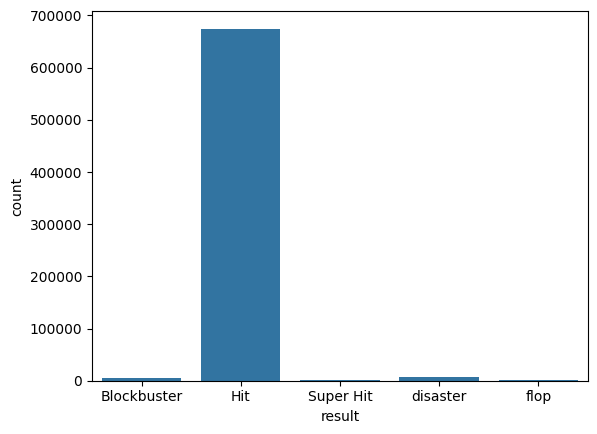

In [47]:
sns.countplot(data=x_data,x="result")

In [48]:
x_data[x_data["result"]=="flop"]

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,result
27,762430,Retribution,Action-Mystery-Thriller-Crime,en,When a mysterious caller puts a bomb under his...,955.039,StudioCanal-The Picture Company-Ombra Films,2023-08-23,20000000.0,12905464.0,...,Released,All roads lead to the truth.,6.836,341.0,Liam Neeson-Noma Dumezweni-Lilly Aspell-Jack C...,bomb-assassination-remake-divorce-duringcredit...,/ljl70pjLIX1hx3bPyCCbxGj6WPr.jpg,/iiXliCeykkzmJ0Eg9RYJ7F2CWSz.jpg,976573-872585,flop
36,299054,Expend4bles,Action-Adventure-Thriller,en,Armed with every weapon they can get their han...,750.624,Millennium Media-Campbell Grobman Films-Lionsgate,2023-09-15,100000000.0,58000000.0,...,Released,They'll die when they're dead.,6.431,815.0,Sylvester Stallone-Jason Statham-50 Cent-Megan...,sequel-nuclear bomb-cargo ship-ring,/iwsMu0ehRPbtaSxqiaUDQB9qMWT.jpg,/wl4NWiZwpzZH67HiDgpDImLyds9.jpg,42333-951491-42332-507089-1039690-926393-13723...,flop
69,466420,Killers of the Flower Moon,Crime-History-Drama,en,When oil is discovered in 1920s Oklahoma under...,452.285,Apple Studios-Imperative Entertainment-Sikelia...,2023-10-18,200000000.0,156300000.0,...,Released,Greed is an animal that hungers for blood.,7.525,2039.0,Leonardo DiCaprio-Robert De Niro-Lily Gladston...,husband wife relationship-based on novel or bo...,/dB6Krk806zeqd0YNp2ngQ9zXteH.jpg,/1X7vow16X7CnCoexXh4H4F2yDJv.jpg,13723-1173558-1056360-944401-299054-3693-96579...,flop
243,820525,After Everything,Romance-Drama,en,Besieged by writer’s block and the crushing br...,182.524,Voltage Pictures-Wattpad,2023-09-13,14000000.0,10600000.0,...,Released,NaN,7.001,594.0,Hero Fiennes Tiffin-Josephine Langford-Mimi Ke...,lisbon portugal-writer's block-sequel-love-wed...,/uQxjZGU6rxSPSMeAJPJQlmfV3ys.jpg,/jkKVLzLWjSvTnc84VzeljhSy6j8.jpg,937249-1182187-899524-335866-565770-410402-926...,flop
296,739405,Operation Fortune: Ruse de Guerre,Action-Thriller-Comedy,en,Special agent Orson Fortune and his team of op...,157.372,Miramax-STX Entertainment-Toff Guy Films-Tence...,2023-01-04,50000000.0,35800000.0,...,Released,"In this operation, everyone has a part to play.",6.876,238.0,Jason Statham-Aubrey Plaza-Josh Hartnett-Hugh ...,NaN,/vQGw9lzfh9hEoYSOWAE5XbZ6J7s.jpg,/6ZZjNFjTlO9F25467CruIibwuxl.jpg,862552-844417-718633-1065890-768362-760099-740...,flop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204083,244941,Varudu,Action,te,A soon to-be married bride is abducted by a ma...,1.124,Goldmines Telefilms-Thameens Films-Universal M...,2010-03-31,4600000.0,4100000.0,...,Released,NaN,4.000,6.0,Allu Arjun-Arya-Bhanu Sri Mehra-Suhasini Manir...,NaN,/b9vJOQal3MfSVdoIoo9hcpsF23P.jpg,NaN,NaN,flop
235856,131677,The Outlander,Drama,fr,It is the early 20th century. A stranger arriv...,0.931,Alliance Atlantis Communications-Téléfilm Cana...,2005-04-22,7000000.0,2866324.0,...,Released,Nevemind!,5.200,3.0,Jean-Nicolas Verreault-Anick Lemay-Gilles Rena...,NaN,/iymwbTBD98K0BIy7DMzkBTomZ7A.jpg,NaN,NaN,flop
286739,116741,The Internship,Comedy,en,Two recently laid-off men in their 40s try to ...,0.822,20th Century Fox-Regency Enterprises-21 Laps E...,2013-06-07,58000000.0,44000000.0,...,Released,Hiring them was a brilliant mistake.,6.300,3781.0,Vince Vaughn-Owen Wilson-Rose Byrne-Aasif Mand...,competition-california-mattress shop-job inter...,/hIh3ZgsZ31nbUAGn5SKIZGKiKCX.jpg,/kms4PhWfP1Q2jidPLOf26qm0paJ.jpg,84199-138832-9522-146239-195589-109439-109418-...,flop
299593,538278,Manticore,Thriller,ru,NaN,0.713,Студия Ацидум,2011-02-11,6000000.0,1756511.0,...,Released,NaN,1.000,4.0,Алексей Завьялов-Екатерина Каренина-Sergey Bur...,NaN,/7IOp9IJtvxNu3Efi7RBHz1vzeeY.jpg,NaN,NaN,flop
